In [25]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
sys.path.append("../../../../src/")
import nanonets
import nanonets_utils

plt.style.use(["science","bright","grid"])

In [2]:
graphs  = []
pos     = []
for seed in range(36):
    topology_parameter  = {
        "Np"                :   81,
        "Nj"                :   0,
        "e_pos"             :   [(-1,-1),(0,-1),(1,-1),(-1,0),(1,0),(-1,1),(0,1),(1,1)],
        "electrode_type"    :   ['constant','constant','constant','constant','constant','constant','constant','constant']
    }
    sim_class   = nanonets.simulation(topology_parameter=topology_parameter)
    g_obj       = sim_class.G
    p           = sim_class.pos
    graphs.append(g_obj)
    pos.append(p)

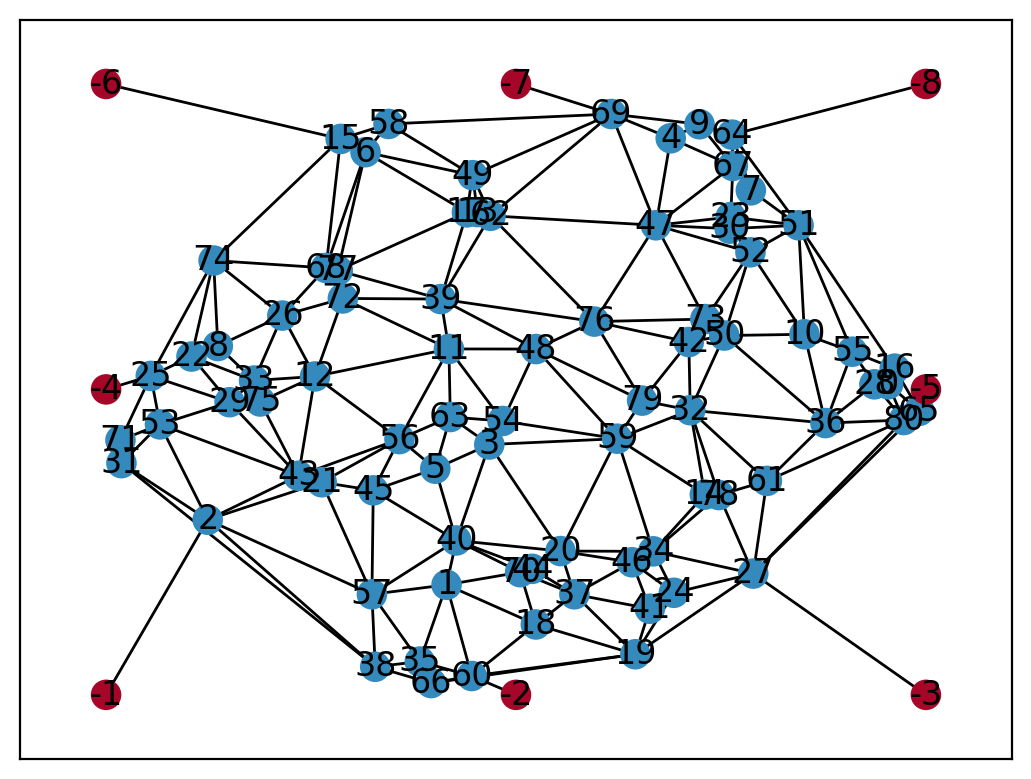

In [11]:
n_g     = 3
fig     = plt.figure(dpi=200)
ax      = fig.add_subplot()
c       = np.repeat(nanonets_utils.blue_color, 81+8)
c[81:]  = nanonets_utils.red_color
ax      = nx.draw_networkx(graphs[n_g], pos[n_g], node_color=c, node_size=100)

In [65]:
path0   = []
path1   = []
clust   = []
degree  = []
for n_g in range(36):
    s_path_0    = nx.shortest_path_length(graphs[n_g], -2, -8)
    s_path_1    = nx.shortest_path_length(graphs[n_g], -4, -8)
    clu         = nx.average_clustering(graphs[n_g])
    ds          = []
    for d in nx.degree(graphs[n_g]):
        if d[0] >= 0:
            ds.append(d[1])
    deg         = np.mean(ds)

    path0.append(s_path_0)
    path1.append(s_path_1)
    clust.append(clu)
    degree.append(deg)
paths       = np.zeros(shape=(36,2))
paths[:,0]  = path0
paths[:,1]  = path1
paths       = pd.DataFrame(paths, columns=['$d(U_1,U_7)$','$d(U_3,U_7)$'])

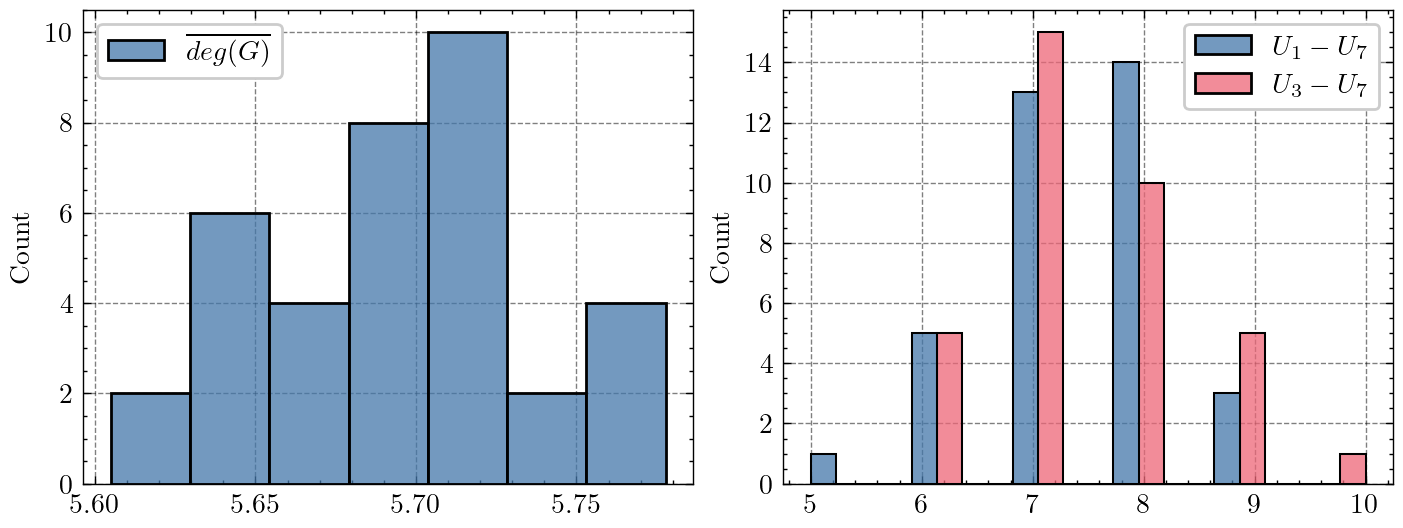

In [75]:
fig = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*2.0)
ax  = fig.add_subplot(1,2,1)
ax  = sns.histplot(degree, ax=ax, label='$\overline{deg(G)}$')
ax.legend()
ax  = fig.add_subplot(1,2,2)
ax  = sns.histplot(paths, ax=ax, multiple='dodge')